In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
from torchinfo import summary
# from google.colab import files
import os
import zipfile
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset
import torch.optim as optim




# Set random seed for reproducibility
torch.manual_seed(0)

#Upload the dataset zip file to Colab
# print("Please upload the cnn_dataset.zip file")
# uploaded = files.upload()  # This opens a file picker to upload cnn_dataset.zip

#Unzip the dataset
# zip_file = list(uploaded.keys())[0]  # Get the name of the uploaded zip file
# with zipfile.ZipFile(zip_file, 'r') as zip_ref:
#     zip_ref.extractall('/content/cnn_dataset')  # Extract to /content/cnn_dataset

# Define the path to the dataset
data_dir = r'C:\Users\nandi\OneDrive\Desktop\SUNY BUFFALO SUM SEM DL\Assignment 1 attached files Jun 6, 2025 956 PM\Assignment 1\cnn_part_1_dataset\cnn_dataset'

# Verify the directory structure
if not os.path.exists(data_dir):
    raise FileNotFoundError(f"Directory {data_dir} not found. Check the zip file structure.")

# Define basic transform
transform = transforms.Compose([
    transforms.ToTensor()  # Convert images to PyTorch tensors
])

# Load the dataset using ImageFolder
dataset = torchvision.datasets.ImageFolder(root=data_dir, transform=transform)

# Create a DataLoader
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers = 2)

# Print dataset details to confirm
print(f"Total number of samples: {len(dataset)}")
print(f"Number of classes: {len(dataset.classes)}")
print(f"Class names: {dataset.classes}")

Total number of samples: 100800
Number of classes: 36
Class names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [32]:
# Analyze dataset statistics
num_samples = len(dataset)
num_classes = len(dataset.classes)
class_names = dataset.classes  # ['0', '1', ..., 'Z']
samples_per_class = Counter(dataset.targets)  # Count samples per class

# Print statistics
print(f"Total number of samples: {num_samples}")
print(f"Number of classes: {num_classes}")
print(f"Class names: {class_names}")
print(f"Samples per class:")
for class_idx, count in sorted(samples_per_class.items()):
    print(f"  Class {class_names[class_idx]}: {count} samples")

# Check image properties
sample_image, _ = dataset[0]
image_shape = sample_image.shape  #[1, 28, 28]
print(f"Image shape: {image_shape} (Channels, Height, Width)")

# Brief description
description = (
    "The dataset comprises 100,800 28x28 images across 36 classes, representing digits (0-9) and letters (A-Z). "
    "Each class contains 2,800 samples, organized in subfolders by class label. "
    "It is designed for multi-class image classification tasks."
)
print("\nDataset Description:")
print(description)

Total number of samples: 100800
Number of classes: 36
Class names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Samples per class:
  Class 0: 2800 samples
  Class 1: 2800 samples
  Class 2: 2800 samples
  Class 3: 2800 samples
  Class 4: 2800 samples
  Class 5: 2800 samples
  Class 6: 2800 samples
  Class 7: 2800 samples
  Class 8: 2800 samples
  Class 9: 2800 samples
  Class A: 2800 samples
  Class B: 2800 samples
  Class C: 2800 samples
  Class D: 2800 samples
  Class E: 2800 samples
  Class F: 2800 samples
  Class G: 2800 samples
  Class H: 2800 samples
  Class I: 2800 samples
  Class J: 2800 samples
  Class K: 2800 samples
  Class L: 2800 samples
  Class M: 2800 samples
  Class N: 2800 samples
  Class O: 2800 samples
  Class P: 2800 samples
  Class Q: 2800 samples
  Class R: 2800 samples
  Class S: 2800 samples
  Class T: 2800 samples
  Class U: 28

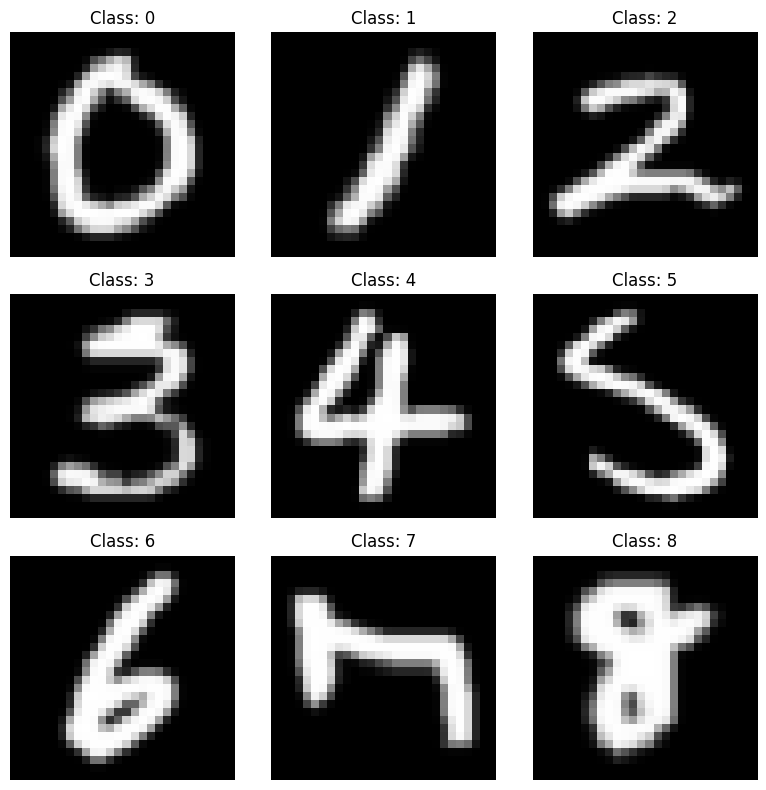

Visualization 1: 3x3 Grid of Sample Images
This visualization displays one 28x28 RGB image from each of the first nine classes (0–8) in a 3x3 grid. It showcases the visual appearance of digits, helping to verify correct dataset loading and understand class diversity.


In [ ]:
# Select one image per class for the first 9 classes (0–8)
num_classes_to_show = 9
sample_images = []
sample_labels = []
class_found = set()

for img, label in dataset:
    if len(class_found) >= num_classes_to_show:
        break
    if label not in class_found:
        sample_images.append(img)
        sample_labels.append(label)
        class_found.add(label)

# Create a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.ravel()

for i in range(num_classes_to_show):
    img = sample_images[i].permute(1, 2, 0).numpy()  # Convert from (C, H, W) to (H, W, C)
    axes[i].imshow(img)  # Grayscale images, so no cmap needed
    axes[i].set_title(f"Class: {class_names[sample_labels[i]]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Description
print("Visualization 1: 3x3 Grid of Sample Images")
print("This visualization displays one 28x28 Grayscale image from each of the first nine classes (0-8) in a 3x3 grid. "
      "It showcases the visual appearance of digits, helping to verify correct dataset loading and understand class diversity.")

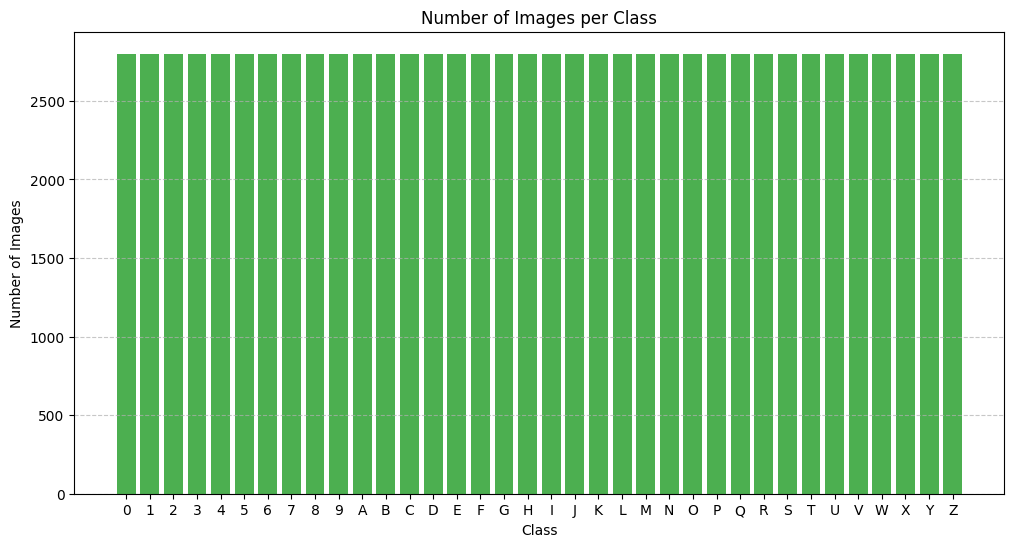

Visualization 2: Bar Chart of Class Distribution
This bar chart shows the number of images per class for all 36 classes (0–9, A–Z), with each class containing 2,800 images. It confirms the dataset is balanced, aiding in planning preprocessing steps without class imbalance corrections.


In [ ]:
# Get the class distribution
class_counts = Counter(dataset.targets)
class_names = dataset.classes
counts = [class_counts[i] for i in range(len(class_names))]

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(class_names, counts, color='#4CAF50')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Visualization 2: Bar Chart of Class Distribution")
print("This bar chart shows the number of images per class for all 36 classes (0-9, A-Z), with each class containing 2,800 images. "
      "It confirms the dataset is balanced, aiding in planning preprocessing steps without class imbalance corrections.")

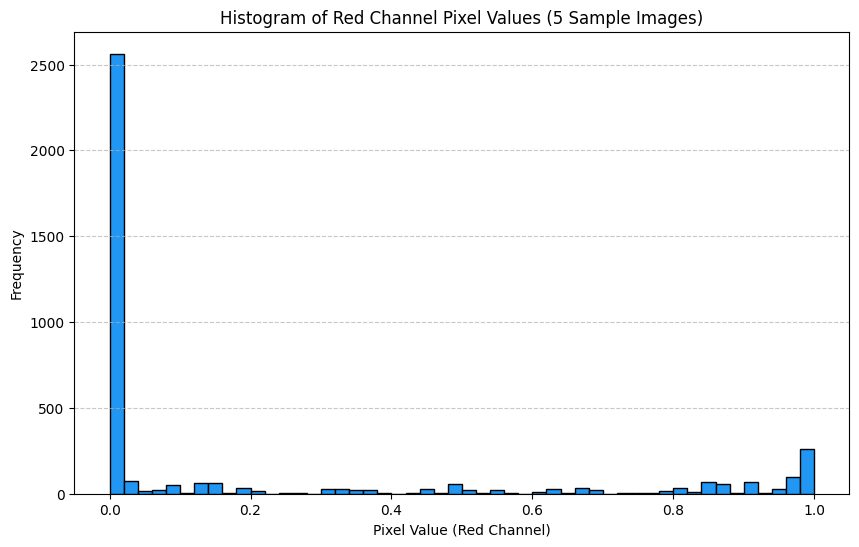

Visualization 3: Histogram of Pixel Values
This histogram shows the distribution of pixel values in the red channel for five sample 28x28 RGB images. It reveals the intensity range and distribution, aiding in selecting appropriate normalization for preprocessing.


In [ ]:
# Select a few sample images (e.g., 5 images)
num_samples = 5
sample_images = [dataset[i][0] for i in range(num_samples)]  # Get images only

# Extract red channel (index 0) pixel values for RGB images
pixel_values = []
for img in sample_images:
    red_channel = img[0, :, :].numpy().flatten()  # Red channel, flattened
    pixel_values.extend(red_channel)

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(pixel_values, bins=50, color='#2196F3', edgecolor='black')
plt.xlabel('Pixel Value (Red Channel)')
plt.ylabel('Frequency')
plt.title('Histogram of Red Channel Pixel Values (5 Sample Images)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Description
print("Visualization 3: Histogram of Pixel Values")
print("This histogram shows the distribution of pixel values in the red channel for five sample 28x28 RGB images. "
      "It reveals the intensity range and distribution, aiding in selecting appropriate normalization for preprocessing.")

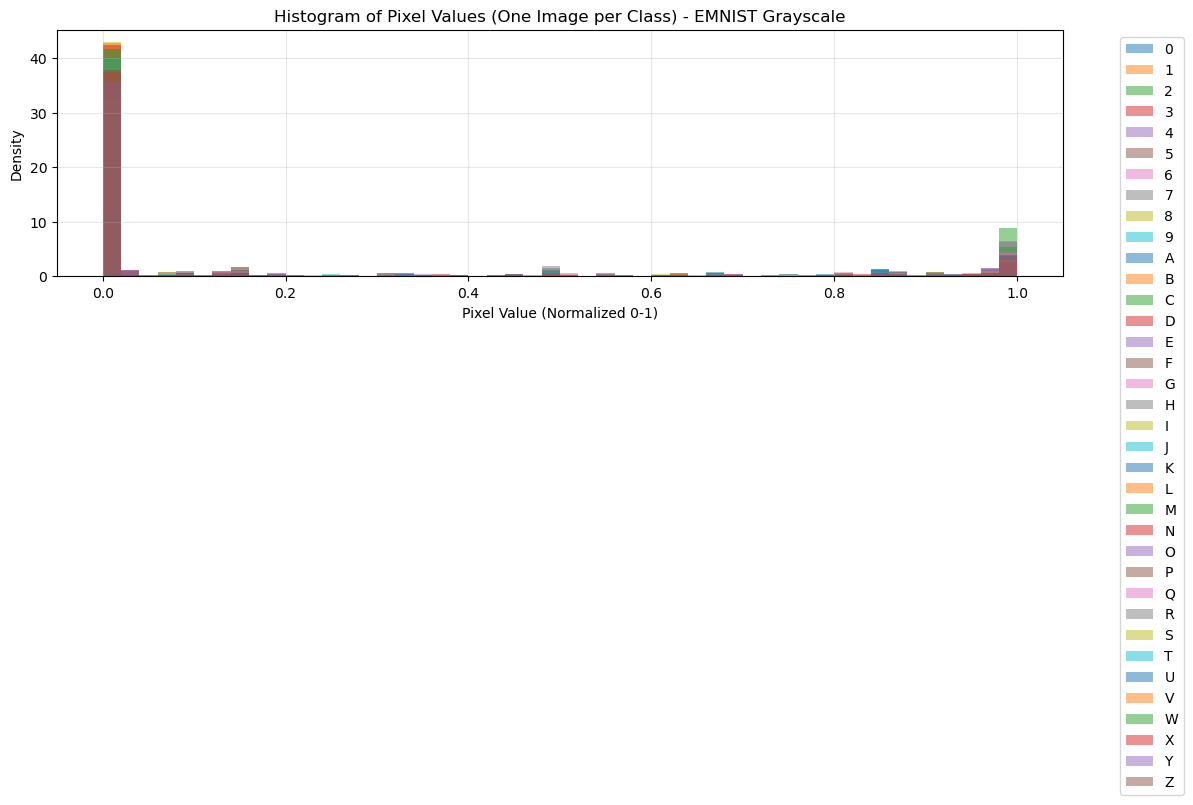

In [ ]:
num_samples = len(dataset)
num_classes = len(dataset.classes)
subset_indices = []
for class_idx in range(num_classes):
    class_indices = [i for i, (_, label) in enumerate(dataset.samples) if label == class_idx]
    subset_indices.extend(class_indices[:1000])  # Limit to 1000 per class
subset = torch.utils.data.Subset(dataset, subset_indices)
class_names = dataset.classes

# Plot histogram for one image per class
plt.figure(figsize=(12, 6))
for i, class_name in enumerate(class_names):
    # Find the first index for this class
    class_idx = dataset.class_to_idx[class_name]  # Map class_name to index
    class_indices = [idx for idx, (_, label) in enumerate(dataset.samples) if label == class_idx]
    if class_indices:  # Ensure indices exist
        img_idx = class_indices[0]  # First image of this class
        img, _ = dataset[img_idx]  # Access image
        pixel_values = img.flatten().numpy()  # Flatten grayscale image
        plt.hist(pixel_values, bins=50, alpha=0.5, label=class_name, density=True)

plt.title('Histogram of Pixel Values (One Image per Class) - EMNIST Grayscale')
plt.xlabel('Pixel Value (Normalized 0-1)')
plt.ylabel('Density')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [48]:
#Temporary transform for calculating mean/std on grayscale
temp_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()
])

#Load dataset temporarily for mean/std computation
temp_dataset = datasets.ImageFolder(root=data_dir, transform=temp_transform)
loader = DataLoader(temp_dataset, batch_size=1000, shuffle=True, num_workers=0)

#Compute mean and std for 1-channel
mean, std, count = 0.0, 0.0, 0
for imgs, _ in loader:
    imgs = imgs.view(imgs.size(0), -1)  # flatten H*W
    mean += imgs.mean(1).sum()
    std += imgs.std(1).sum()
    count += imgs.size(0)

mean /= count
std /= count

print(f" Mean: {mean.item():.6f}, Std: {std.item():.6f}")


 Mean: 0.175816, Std: 0.327043


In [2]:

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.175816], std=[0.327043])  #  1-channel only
])
dataset = torchvision.datasets.ImageFolder(root=data_dir, transform=transform)


In [3]:
# Get indices for all samples
indices = list(range(len(dataset)))

# Split into train (70%) and temp (30%) sets
train_indices, temp_indices = train_test_split(indices, train_size=0.7, random_state=0, stratify=dataset.targets)

# Split temp into validation (15%) and test (15%) sets
val_indices, test_indices = train_test_split(temp_indices, train_size=0.5, random_state=0, stratify=[dataset.targets[i] for i in temp_indices])

# Create Subset datasets
train_dataset = Subset(dataset, train_indices)
val_dataset = Subset(dataset, val_indices)
test_dataset = Subset(dataset, test_indices)

# Create DataLoaders for each set
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

# Print split sizes to confirm
print(f"Training set size: {len(train_dataset)} samples")
print(f"Validation set size: {len(val_dataset)} samples")
print(f"Test set size: {len(test_dataset)} samples")

Training set size: 70560 samples
Validation set size: 15120 samples
Test set size: 15120 samples


### Building Model

In [4]:
class EMNISTCNN(nn.Module):
    def __init__(self, num_classes=36):
        super(EMNISTCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),           # [32, 14, 14]

            nn.Conv2d(32, 64, kernel_size=3, padding=1),     # [64, 14, 14]
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),           # [64, 7, 7]

            nn.Conv2d(64, 128, kernel_size=3, padding=1),    # [128, 7, 7]
            nn.ReLU(inplace=True),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(p=0.5),
            nn.Linear(128 * 7 * 7, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(512, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

model = EMNISTCNN(num_classes=36)
summary(model, input_size=(32, 1, 28, 28), device='cpu')


Layer (type:depth-idx)                   Output Shape              Param #
EMNISTCNN                                [32, 36]                  --
├─Sequential: 1-1                        [32, 128, 7, 7]           --
│    └─Conv2d: 2-1                       [32, 32, 28, 28]          320
│    └─ReLU: 2-2                         [32, 32, 28, 28]          --
│    └─MaxPool2d: 2-3                    [32, 32, 14, 14]          --
│    └─Conv2d: 2-4                       [32, 64, 14, 14]          18,496
│    └─ReLU: 2-5                         [32, 64, 14, 14]          --
│    └─MaxPool2d: 2-6                    [32, 64, 7, 7]            --
│    └─Conv2d: 2-7                       [32, 128, 7, 7]           73,856
│    └─ReLU: 2-8                         [32, 128, 7, 7]           --
├─Sequential: 1-2                        [32, 36]                  --
│    └─Dropout: 2-9                      [32, 6272]                --
│    └─Linear: 2-10                      [32, 512]                 3,211,776

### Training (Adam)

In [ ]:
# Define device (use GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation phase
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}]")
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")
    print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")

# Save the model weights
torch.save(model.state_dict(), '/content/a1_part_1_Adam.pt')
print("Model weights saved to /content/a1_part_1_Adam.pt")

Epoch [1/10]
Train Loss: 0.6122, Train Accuracy: 79.84%
Val Loss: 0.2939, Val Accuracy: 88.91%
Epoch [2/10]
Train Loss: 0.3560, Train Accuracy: 87.22%
Val Loss: 0.2711, Val Accuracy: 90.17%
Epoch [3/10]
Train Loss: 0.3112, Train Accuracy: 88.60%
Val Loss: 0.2494, Val Accuracy: 90.70%
Epoch [4/10]
Train Loss: 0.2820, Train Accuracy: 89.53%
Val Loss: 0.2493, Val Accuracy: 90.62%
Epoch [5/10]
Train Loss: 0.2631, Train Accuracy: 90.08%
Val Loss: 0.2338, Val Accuracy: 90.99%
Epoch [6/10]
Train Loss: 0.2484, Train Accuracy: 90.59%
Val Loss: 0.2324, Val Accuracy: 91.25%
Epoch [7/10]
Train Loss: 0.2401, Train Accuracy: 90.79%
Val Loss: 0.2339, Val Accuracy: 91.01%
Epoch [8/10]
Train Loss: 0.2321, Train Accuracy: 91.00%
Val Loss: 0.2394, Val Accuracy: 91.53%
Epoch [9/10]
Train Loss: 0.2224, Train Accuracy: 91.32%
Val Loss: 0.2298, Val Accuracy: 91.53%
Epoch [10/10]
Train Loss: 0.2156, Train Accuracy: 91.44%
Val Loss: 0.2306, Val Accuracy: 91.63%
Model weights saved to /content/model_weights.pt


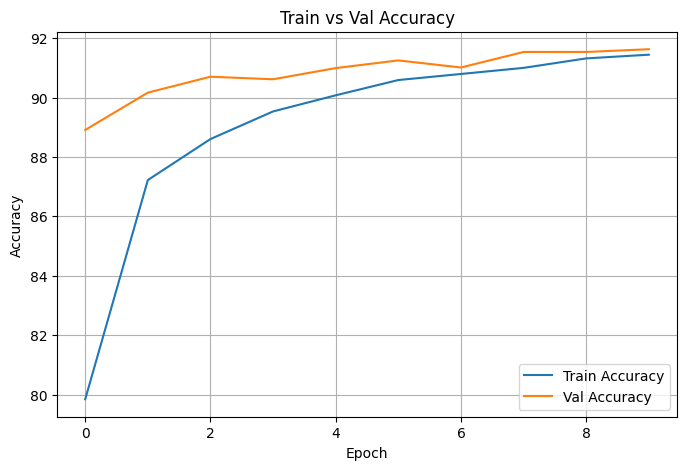

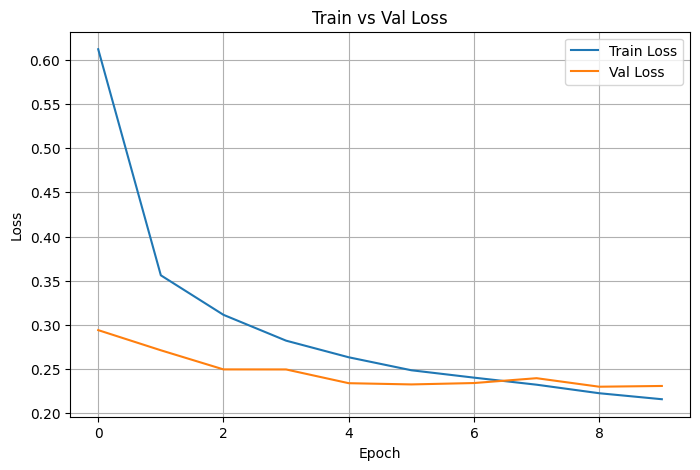

In [ ]:
# Plot accuracy
plt.figure(figsize=(8, 5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train vs Val Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Val Loss')
plt.legend()
plt.grid(True)
plt.show()


In [45]:
import torch.nn.functional as F

def evaluate_model(model, dataloader, criterion):
    model.eval()
    correct, total, loss_sum = 0, 0, 0.0

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss_sum += loss.item() * labels.size(0)

            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    avg_loss = loss_sum / total
    accuracy = 100 * correct / total
    return avg_loss, accuracy

# Evaluate on test set
test_loss, test_acc = evaluate_model(model, test_loader, criterion)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")


Test Loss: 0.2226, Test Accuracy: 92.06%


### Evaluation on Test Set

- Test Accuracy: 92.06%
- Test Loss: 0.2226

We evaluated the model using the entire test set of 15,120 images. Results indicate strong generalization, with performance consistent with validation accuracy.


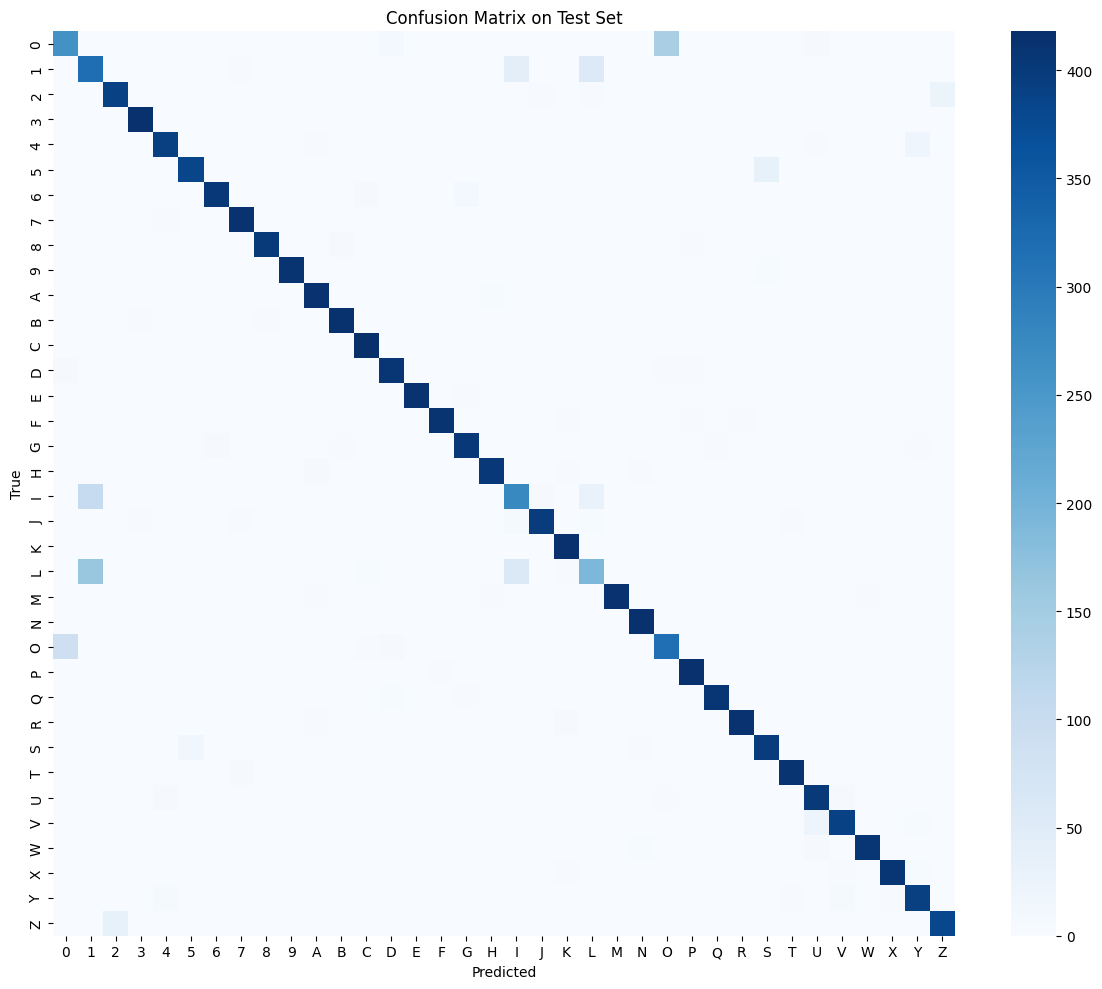

Macro Precision: 0.9222
Macro Recall:    0.9206
Macro F1 Score:  0.9200


In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

# Get true labels and predictions
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.title("Confusion Matrix on Test Set")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# Precision, Recall, F1
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='macro')
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall:    {recall:.4f}")
print(f"Macro F1 Score:  {f1:.4f}")


### Confusion Matrix and Metrics

- The confusion matrix shows that most classes are predicted correctly, though some letters with similar visual shapes (e.g., `O` vs `Q` vs `0`) may have minor confusion.
- **Precision**: 0.9222%
- **Recall**: 0.9206%
- **F1 Score**: 0.9200%

We used `macro` averaging to ensure equal weight for each class. This gives a better sense of balanced performance across all 36 categories.


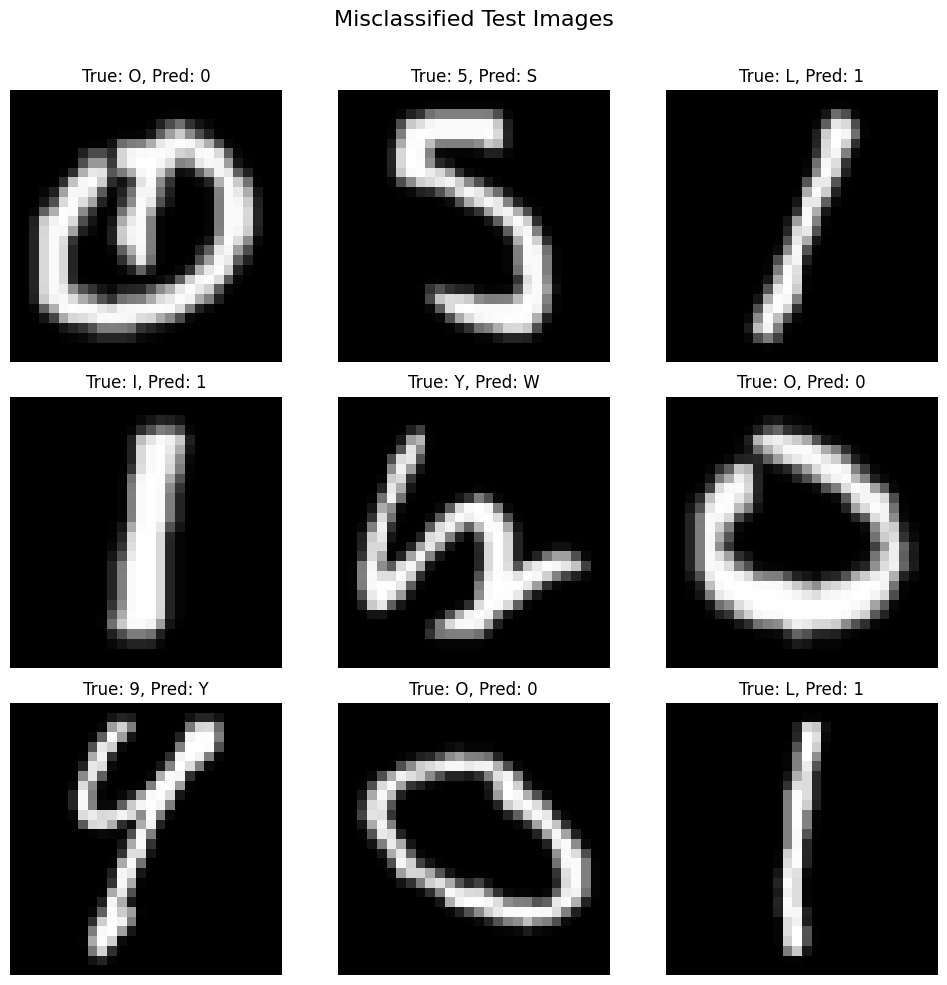

In [47]:
def show_misclassified(model, dataloader, class_names, num_images=9):
    model.eval()
    misclassified = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for img, label, pred in zip(inputs, labels, preds):
                if label != pred:
                    misclassified.append((img.cpu(), label.cpu(), pred.cpu()))
                if len(misclassified) >= num_images:
                    break
            if len(misclassified) >= num_images:
                break

    # Plot misclassified images
    plt.figure(figsize=(10, 10))
    for i, (img, true_label, pred_label) in enumerate(misclassified):
        plt.subplot(3, 3, i+1)
        plt.imshow(img.squeeze(), cmap='gray')
        plt.title(f"True: {class_names[true_label]}, Pred: {class_names[pred_label]}")
        plt.axis('off')
    plt.tight_layout()
    plt.suptitle("Misclassified Test Images", fontsize=16)
    plt.subplots_adjust(top=0.9)
    plt.show()

# Run it
show_misclassified(model, test_loader, dataset.classes, num_images=9)


### Misclassified Images

Above are some examples where the model made incorrect predictions. Misclassifications may occur between visually similar characters (e.g., 'y' vs '9', 'l' vs '1'), or due to low contrast, noise, or unclear stroke structure.

These edge cases suggest further improvements could include better data augmentation, increased depth, or attention mechanisms.


### Training (SGD)
The training loop here is taken from a0_part_2_nsoni.ipynb and adapted for the EMNIST model

In [5]:
import time
# Define device (use GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer_sgd = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer_sgd, step_size=10, gamma=0.1)

# Early stopping parameters
patience = 5
best_val_loss = float('inf')
early_stop_counter = 0
best_model_weights = None

# Training loop
num_epochs = 10
batch_size=32
train_losses, val_losses = [], []
train_accs, val_accs= [], []

start_time = time.time()
for epoch in range(num_epochs):
  model.train()
  train_loss, train_correct, train_total = 0, 0, 0
  for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer_sgd.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_sgd.step()

        train_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (preds == labels).sum().item()

  train_loss /= len(train_loader)
  train_acc = train_correct / train_total
  train_losses.append(train_loss)
  train_accs.append(train_acc)

  #Validation
  model.eval()
  val_loss, val_correct, val_total = 0, 0, 0
  with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        val_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        val_total += labels.size(0)
        val_correct += (preds == labels).sum().item()

  val_loss /= len(val_loader)
  val_acc = val_correct / val_total
  val_losses.append(val_loss)
  val_accs.append(val_acc)

  print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
  scheduler.step()

  if val_loss < best_val_loss:
    best_val_loss = val_loss
    best_model_weights = model.state_dict().copy()
    early_stop_counter = 0
    torch.save(best_model_weights, 'a1_part_1_SGD.pt')
    print("Best model weights saved")
  else:
    early_stop_counter += 1
    if early_stop_counter >= patience:
        print("Early stopping triggered")
        break
training_time = time.time() - start_time
print(f"Training Time: {training_time:.2f} seconds")

Epoch 1/10, Train Loss: 0.7696, Train Acc: 0.7530, Val Loss: 0.3326, Val Acc: 0.8745
Best model weights saved
Epoch 2/10, Train Loss: 0.3744, Train Acc: 0.8658, Val Loss: 0.2670, Val Acc: 0.8994
Best model weights saved
Epoch 3/10, Train Loss: 0.3157, Train Acc: 0.8869, Val Loss: 0.2370, Val Acc: 0.9105
Best model weights saved
Epoch 4/10, Train Loss: 0.2873, Train Acc: 0.8929, Val Loss: 0.2372, Val Acc: 0.9074
Epoch 5/10, Train Loss: 0.2673, Train Acc: 0.8987, Val Loss: 0.2331, Val Acc: 0.9137
Best model weights saved
Epoch 6/10, Train Loss: 0.2508, Train Acc: 0.9040, Val Loss: 0.2321, Val Acc: 0.9114
Best model weights saved
Epoch 7/10, Train Loss: 0.2405, Train Acc: 0.9065, Val Loss: 0.2258, Val Acc: 0.9164
Best model weights saved
Epoch 8/10, Train Loss: 0.2296, Train Acc: 0.9113, Val Loss: 0.2301, Val Acc: 0.9128
Epoch 9/10, Train Loss: 0.2208, Train Acc: 0.9138, Val Loss: 0.2199, Val Acc: 0.9153
Best model weights saved
Epoch 10/10, Train Loss: 0.2136, Train Acc: 0.9162, Val Loss

In [6]:
import torch.nn.functional as F

def evaluate_model(model, dataloader, criterion):
    model.eval()
    correct, total, loss_sum = 0, 0, 0.0

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss_sum += loss.item() * labels.size(0)

            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    avg_loss = loss_sum / total
    accuracy = 100 * correct / total
    return avg_loss, accuracy

# Evaluate on test set
test_loss, test_acc = evaluate_model(model, test_loader, criterion)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")

Test Loss: 0.2199, Test Accuracy: 91.45%


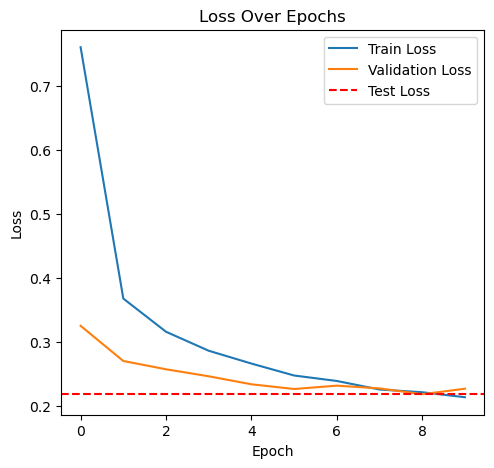

In [54]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

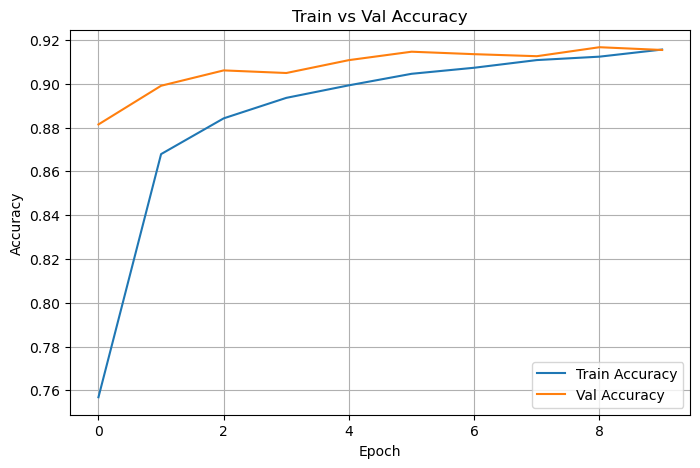

In [60]:
plt.figure(figsize=(8, 5))
plt.plot(train_accs, label='Train Accuracy')
plt.plot(val_accs, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train vs Val Accuracy')
plt.legend()
plt.grid(True)
plt.show()

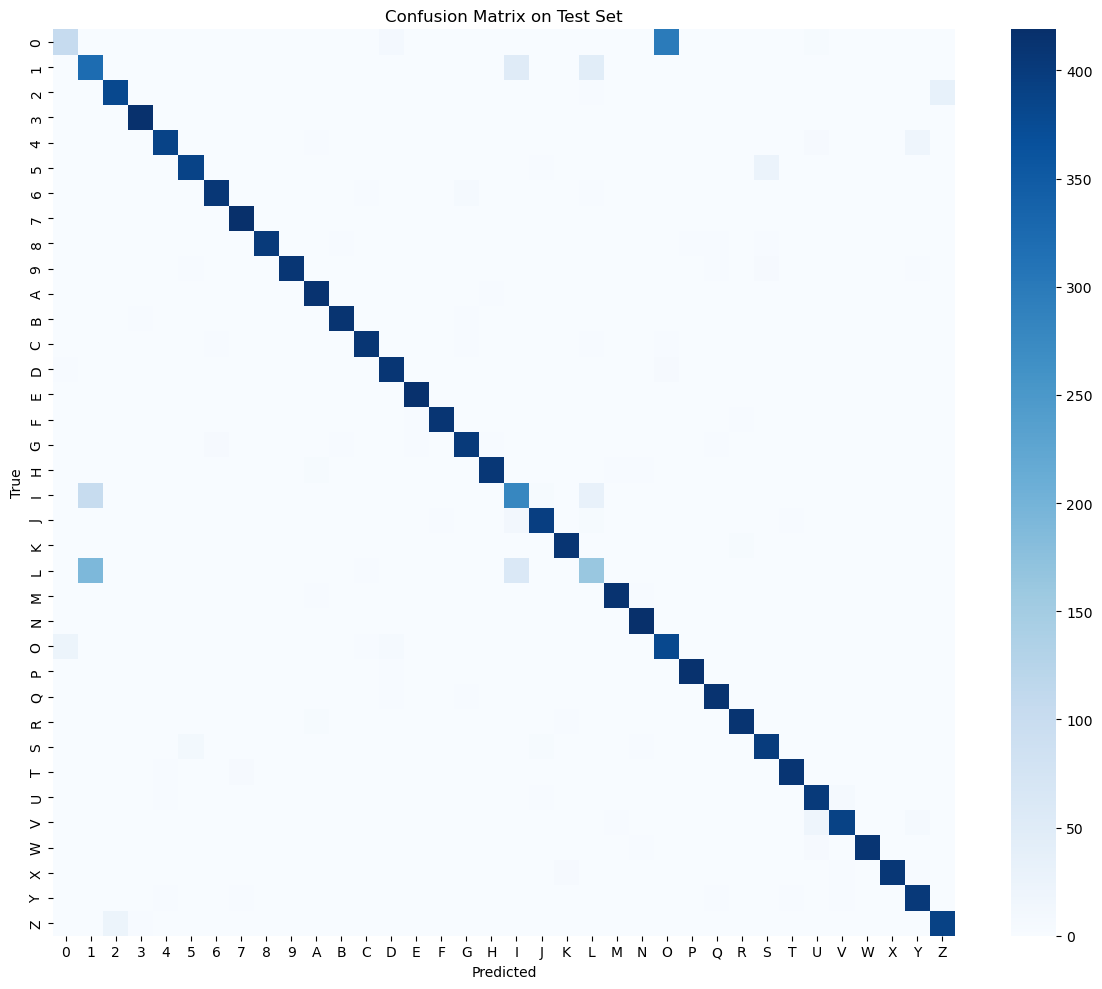

Macro Precision: 0.9209
Macro Recall:    0.9145
Macro F1 Score:  0.9110


In [11]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import seaborn as sns

# Get true labels and predictions
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.title("Confusion Matrix on Test Set")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# Precision, Recall, F1
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='macro')
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall:    {recall:.4f}")
print(f"Macro F1 Score:  {f1:.4f}")

### Confusion Matrix and Metrics

- The confusion matrix shows that most classes are predicted correctly, though some letters with similar visual shapes (e.g., `0` vs `Q` vs `O`, `L` vs `1` vs `I`) may have minor confusion.
- **Precision**: 0.9209
- **Recall**: 0.9145
- **F1 Score**: 0.9110

We used `macro` averaging to ensure equal weight for each class. This gives a better sense of balanced performance across all 36 categories.


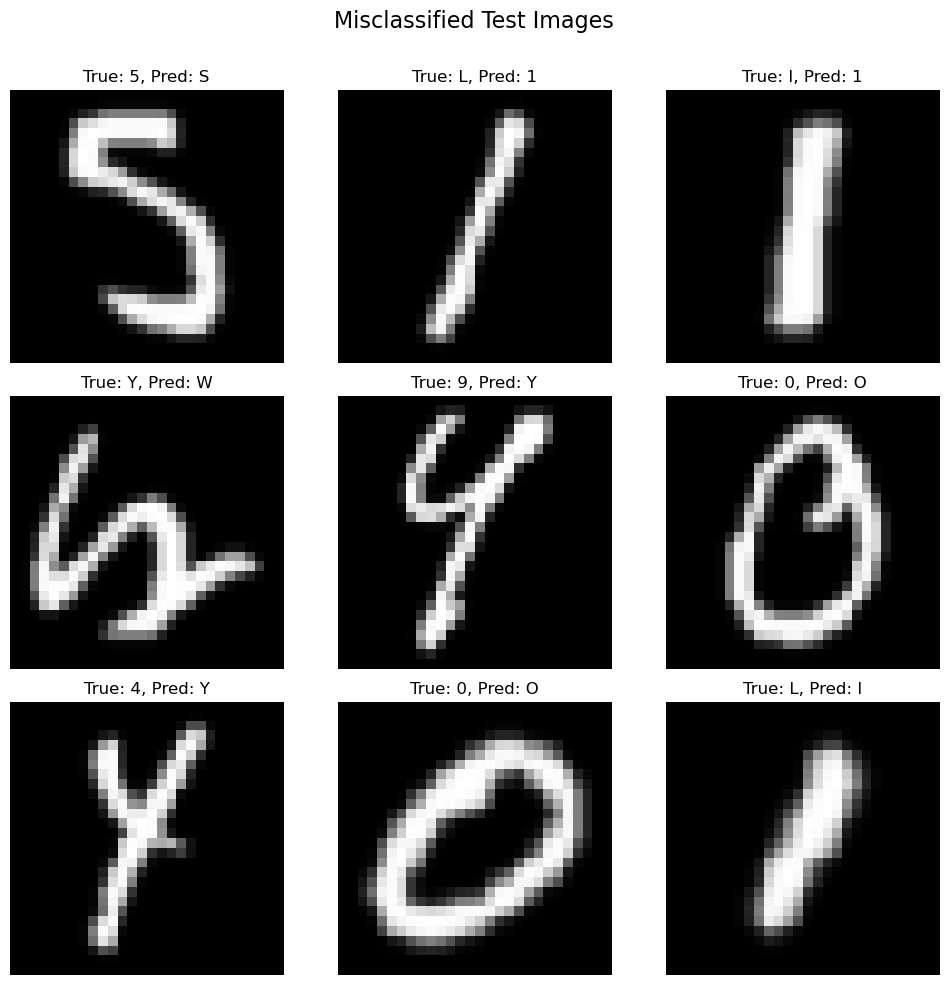

In [12]:
def show_misclassified(model, dataloader, class_names, num_images=9):
    model.eval()
    misclassified = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for img, label, pred in zip(inputs, labels, preds):
                if label != pred:
                    misclassified.append((img.cpu(), label.cpu(), pred.cpu()))
                if len(misclassified) >= num_images:
                    break
            if len(misclassified) >= num_images:
                break

    # Plot misclassified images
    plt.figure(figsize=(10, 10))
    for i, (img, true_label, pred_label) in enumerate(misclassified):
        plt.subplot(3, 3, i+1)
        plt.imshow(img.squeeze(), cmap='gray')
        plt.title(f"True: {class_names[true_label]}, Pred: {class_names[pred_label]}")
        plt.axis('off')
    plt.tight_layout()
    plt.suptitle("Misclassified Test Images", fontsize=16)
    plt.subplots_adjust(top=0.9)
    plt.show()

# Run it
show_misclassified(model, test_loader, dataset.classes, num_images=9)

### Misclassified Images

Above are some examples where the model made incorrect predictions. Misclassifications may occur between visually similar characters (e.g., `O` vs `0`, `L` vs `I`, 'Y' vs '4', 'Y' vs 'w'), or due to low contrast, noise, or unclear stroke structure. In this case we also observe that even a human can predict the image at (2,1) as W or image at (1,1) as S instead of 5.

These edge cases suggest further improvements could include better data augmentation, increased depth, or attention mechanisms.


# Best Optimizer
* Adam: Test Loss: 0.2226, Test Accuracy: 92.06% 
* SGD: Test Loss: 0.2199, Test Accuracy: 91.45%
* Both the optimizers gave approximately the same accuracy. For Adam, we have used dropout and data augmentation. For SGD, we have additionally added LR scheduler and early stopping on top of that. So, if we compare the two, Adam evidently performed better than SGD. Adam optimizer converges faster due to its adaptive learning rate, which adjusts based on the first and second momnents of gradients. This makes is more efficient for complex datasets with noisy gradients, like this 36-class image classification task. On the other hand, SGD converges more slowly as it relies on a fixed step size. However, with momentum, it can approach Adam's speed while maintaining stability which is shown with the minimal difference between the accuracy of the two optimzers.

### Optimization tools:
* Learning Rate: Adam’s adaptive learning rate reduces the need for manual tuning, while SGD requires careful selection (e.g., starting with lr=0.01 and reducing it over time).A poorly chosen learning rate for SGD can lead to slow convergence or divergence.

* Momentum (SGD): Adding momentum (= 0.9, here) accelerates SGD by incorporating past gradients, improving convergence speed and stability.


# Metrics Analysis
* The performance of both Adam and SGD was again on par with each other. And overall gave competetive metrics which illustrate good performance. 
* Adam achieved slightly higher F1 scores likely due to faster convergence and better handling of complex patterns, especially for visually similar classes.
* SGD has slightly lower F1 scores for challenging classes if it struggles to escape local minima or if the learning rate is suboptimal.
* Since, the F1 score was around 0.92 for Adam(with minor variations for harder-to-classify classes) it suggests the accuracy will be above 90% which is evident since we get 92% accuracy.
* But as seen in the misclassified images and confusion matrix section there are still some letters and numbers which were harder to classify and resulted in mistakes by the model. The results can improved with further data augmentation, adding LR scheduler to Adam opitmizer or a deeper neural network with appropriate regularization to avoid overfitting or perhaps underfitting as well.

# Misclassified Images Analysis
* Visual Simiarity between classes
    * Examples: ‘O’ (letter) vs. ‘0’ (digit): Both are circular, and small variations in handwriting or pixel noise could lead to confusion.
    * The CNN may struggle t    o capture subtle differences in low-resolution images, especially if the convolutional filters are not fine-tuned to detect class-specific features.
* Image Noise
    * The 28x28 grayscale images may contain noise, blurry edges, or inconsistent handwriting styles (common in datasets like EMNIST).
    * Noise can obscure critical features, causing the model to rely on incorrect patterns (e.g., mistaking a slanting/smudged ‘4’ for a ‘9’).
* Insufficient Model Capacity:
    * If the CNN architecture is too shallow (e.g., few convolutional layers or small fully connected layers), it may not learn complex features to distinguish similar classes.
    * A shallow model might prioritize coarse features (e.g., overall shape) over fine details.
* Overfitting or Underfitting:
    * Overfitting: If the model overfits to the training set, it may perform poorly on test images with slight variations (e.g., different handwriting styles).
    * Underfitting: If training is insufficient (e.g., too few epochs or a high learning rate in SGD), the model may not learn robust features.
    * Misclassifications may occur if the model generalizes poorly to unseen data.
* Data Preprocessing:
    * We haven't used any additional augmentations like rotation or scaling. We used normalization and grayscale.
    * Lack of normalization or augmentation may make the model sensitive to variations in pixel intensity or slight transformations, leading to misclassifications.

# References
1. Part 1 Step 3 (Training: SGD) is based on the CSE 676 Deep learning Assignment 0 submission by Nandini Hemang Soni.
2. https://pytorch.org/docs/stable/nn.html
3. https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

## Team Contribution Summary

| Team Member       | Contribution (%) |
|-------------------|------------------|
| Harshitha Gowdar Mallikarjuna Prasanna  | 50%              |
| Nandini Hemang Soni  | 50%              |
